<h1>UK ROAD ACCIDENTS DATA ANALYSIS</h1>
<H2>INCLUSIVE YEAR 2019 - 2022</H2>
<H3> ANALYST: JUNTEREAL,RUSS</H3>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
accident = pd.read_csv('accident_data.csv')

In [7]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [8]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [9]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area '] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [10]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  category      
 10  Road_Type                656159 non-null  category      
 11  Urban_or_Rural_Area      660664 non-null  category      
 12  Weather_Conditio

In [11]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
District Area                   0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

In [12]:
accident['Latitude'].mode()
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'].mode()
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'].mode()
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'].mode()
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'].mode()
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'].mode()
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [13]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
District Area                   0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

<h1>What is the percentage distribution of accident severity?</h1>

In [14]:
accident['Accident_Severity'].value_counts(normalize=True) * 100

Accident_Severity
Slight     85.336601
Serious    13.352475
Fatal       1.310924
Name: proportion, dtype: float64

<h1>Insight No.1</h1>
<h2>The vast majority of accidents (85.34%) are slight, while serious accidents account for 13.35%, and fatal accidents are rare at just 1.31%, indicating that while accidents are common, most are not life-threatening.</h2>

<h1>How many accidents occurred in each year?</h1>

In [15]:
accident_per_year = accident['Year'].value_counts()

In [16]:
accident_per_year

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

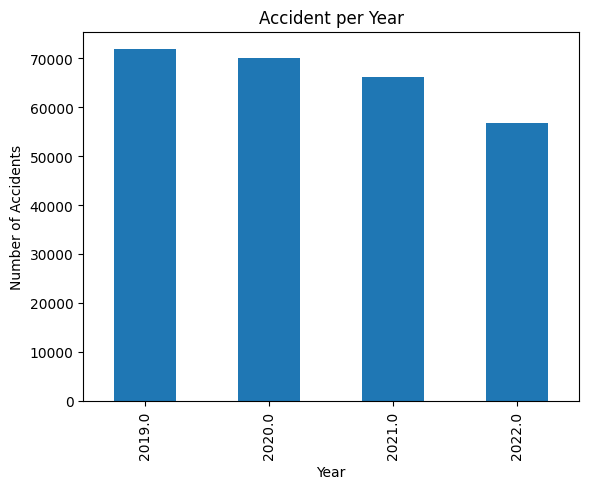

In [18]:
accident_per_year.plot(kind='bar')
plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.2</h1>
<h2>The total number of accidents over four years is 660,679, with 2019 accounting for the highest share (27.6%) and 2022 the lowest (21.9%), showing a consistent decline in accidents each year.</h2>

<h1>On which day of the week do most accidents occur?</h1>

In [19]:
accident_per_day = accident['DayOfWeek'].value_counts()
accident_per_day

DayOfWeek
5.0    43164
2.0    40037
4.0    39822
3.0    39641
1.0    38714
6.0    35065
0.0    28564
Name: count, dtype: int64

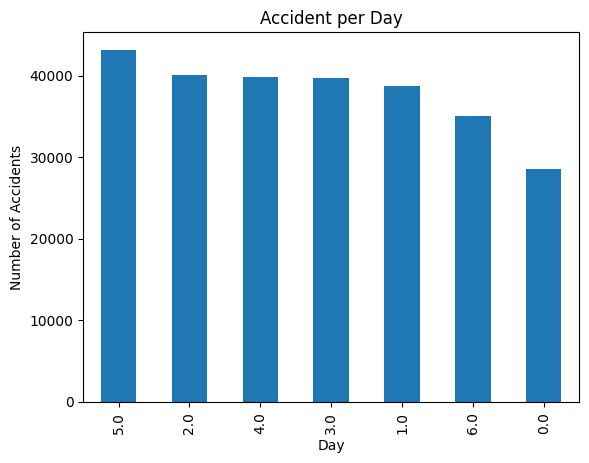

In [22]:
accident_per_day.plot(kind='bar')
plt.title('Accident per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.3</h1>
<h2>Fridays have the highest number of accidents, suggesting increased traffic and possibly fatigued or rushed driving at the end of the workweek, while Sundays have the least.</h2>

<h1>Which month has the highest accident severity?</h1>

In [13]:
accident.groupby('Month')['Accident_Severity'].value_counts()

Month  Accident_Severity
1.0    Slight               15761
       Serious               2219
       Fatal                  272
2.0    Slight               19227
       Serious               2768
       Fatal                  269
3.0    Slight               18699
       Serious               2833
       Fatal                  292
4.0    Slight               16659
       Serious               2828
       Fatal                  300
5.0    Slight               18423
       Serious               2999
       Fatal                  301
6.0    Slight               18856
       Serious               3079
       Fatal                  261
7.0    Slight               19562
       Serious               3082
       Fatal                  295
8.0    Slight               17779
       Serious               3016
       Fatal                  311
9.0    Slight               19069
       Serious               3190
       Fatal                  299
10.0   Slight               20401
       Serious         

<h1>Insight No.4</h1>
<h2>November has the highest number of accidents overall, but August records the highest number of fatal accidents (801).</h2>

<h1>Top 5 districts with the most accidents?</h1>

In [23]:
top_5_DA = accident['District Area'].value_counts().head(5)
top_5_DA

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

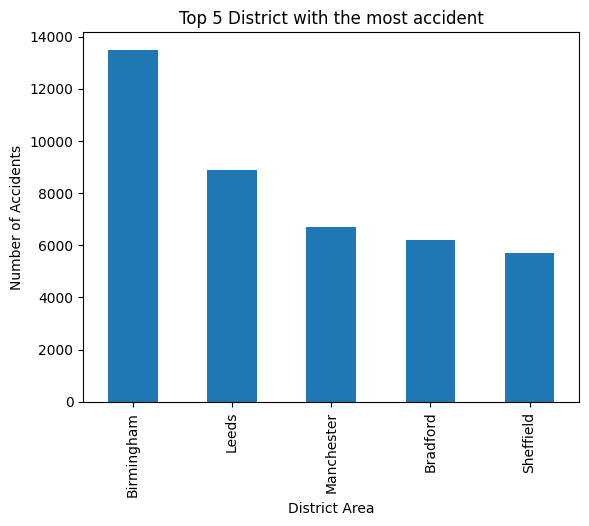

In [24]:
top_5_DA.plot(kind='bar')
plt.title('Top 5 District with the most accident')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.5</h1>
<h2>Birmingham accounts for 19.2%, Leeds 12.7%, Manchester 9.6%, Bradford 8.8%, and Sheffield 8.1% of accidents among the top five districts, highlighting Birmingham as the most accident-prone area.</h2>

<h1>How many accidents happened in urban vs rural areas??</h1>

In [25]:
urban_vs_rural = accident['Urban_or_Rural_Area'].value_counts()
urban_vs_rural

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

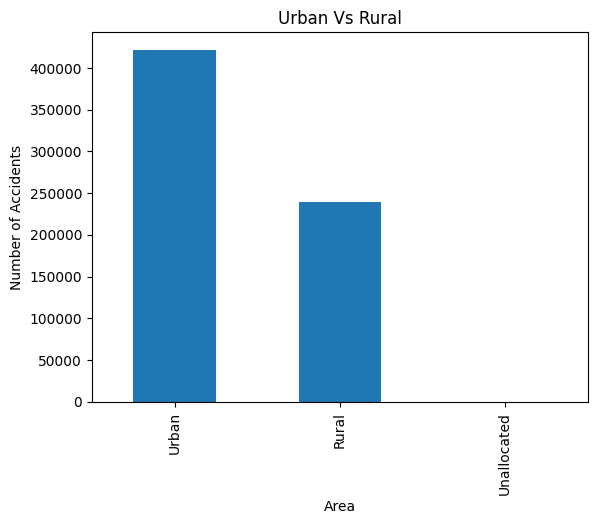

In [26]:
urban_vs_rural.plot(kind='bar')
plt.title('Urban Vs Rural')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.6</h1>
<h2>Urban areas account for 63.8% of accidents, while rural areas make up 36.2%, indicating that accidents are significantly more frequent in urban settings</h2>

<h1>Which vehicle type is most commonly involved in accidents in urban areas?</h1>

In [16]:
accident[accident['Urban_or_Rural_Area'] == 'Urban']['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      316062
Van / Goods 3.5 tonnes mgw or under       22003
Bus or coach (17 or more pass seats)      16851
Motorcycle over 500cc                     16700
Goods 7.5 tonnes mgw and over             11151
Motorcycle 125cc and under                10246
Taxi/Private hire car                      8617
Motorcycle over 125cc and up to 500cc      4982
Motorcycle 50cc and under                  4893
Goods over 3.5t. and under 7.5t            3864
Other vehicle                              3643
Agricultural vehicle                       1272
Minibus (8 - 16 passenger seats)           1258
Pedal cycle                                 127
Data missing or out of range                  6
Ridden horse                                  3
Name: count, dtype: int64

<h1>Insight No.7</h1>
<h2>Cars dominate urban accidents, making up the vast majority, while motorcycles and taxis also contribute significantly, highlighting the risk for both private and commercial vehicles in urban areas</h2>

<h1>Which vehicle type is most commonly involved in accidents in rural areas??</h1>

In [17]:
accident[accident['Urban_or_Rural_Area'] == 'Rural']['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      181922
Van / Goods 3.5 tonnes mgw or under       12156
Bus or coach (17 or more pass seats)       9025
Motorcycle over 500cc                      8957
Goods 7.5 tonnes mgw and over              6156
Motorcycle 125cc and under                 5023
Taxi/Private hire car                      4677
Motorcycle 50cc and under                  2710
Motorcycle over 125cc and up to 500cc      2674
Goods over 3.5t. and under 7.5t            2232
Other vehicle                              1994
Minibus (8 - 16 passenger seats)            718
Agricultural vehicle                        675
Pedal cycle                                  70
Ridden horse                                  1
Data missing or out of range                  0
Name: count, dtype: int64

<h1>Insight No.8</h1>
<h2>Cars are the most involved vehicles in rural accidents, but motorcycles but especially those over 500cc it appears more frequently in rural areas compared to urban areas, suggesting a higher risk for motorcyclists on rural roads.</h2>

<h1>Do wet road conditions lead to more severe accidents?</h1>

In [18]:
accident.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts()

Road_Surface_Conditions  Accident_Severity
Dry                      Slight               381049
                         Serious               61708
                         Fatal                  5790
Flood over 3cm. deep     Slight                  842
                         Serious                 152
                         Fatal                    23
Frost or ice             Slight                16317
                         Serious                2007
                         Fatal                   193
Snow                     Slight                 5290
                         Serious                 565
                         Fatal                    35
Wet or damp              Slight               160303
                         Serious               23785
                         Fatal                  2620
Name: count, dtype: int64

<h1>Insight No.9</h1>
<h2>Wet or damp roads account for a significant proportion of serious (27.7%) and fatal (28.9%) accidents compared to dry roads, indicating that wet conditions increase the risk of severe accidents.</h2>

<h1>Are accidents more severe at night than during the day?</h1>

In [19]:
accident.groupby('Light_Conditions')['Accident_Severity'].value_counts(normalize=True) * 100

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Slight               86.705737
                             Serious              12.245527
                             Fatal                 1.048735
Darkness - lights lit        Slight               83.770828
                             Serious              14.791047
                             Fatal                 1.438126
Darkness - lights unlit      Slight               84.073928
                             Serious              14.156508
                             Fatal                 1.769564
Darkness - no lighting       Slight               76.531239
                             Serious              19.162860
                             Fatal                 4.305901
Daylight                     Slight               86.422414
                             Serious              12.530729
                             Fatal                 1.046857
Name: proportion, dtype: float64

<h1>Insight No.10</h1>
<h2>Accidents in complete darkness with no lighting have the highest severity, with 19.16% serious and 4.31% fatal, nearly quadrupling the fatality rate compared to daylight (1.05%), highlighting the dangers of poorly lit roads at night.</h2>

<h1>Correlation between accident severity and weather conditions?</h1>

In [20]:
pd.crosstab(accident['Weather_Conditions'], accident['Accident_Severity'])

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


<h1>Insight No.11</h1>
<h2>Fatal accidents are highest in "Fine no high winds" conditions (7,207), but the proportion of severe accidents is noticeably higher in adverse weather like "Raining + high winds" and "Fog or mist," suggesting that while most accidents happen in clear weather due to higher traffic volume, bad weather increases accident severity</h2>

<h1>Which road type has the highest number of fatal accidents?<h1>

In [21]:
accident[accident['Accident_Severity'] == 'Fatal']['Road_Type'].value_counts()

Road_Type
Single carriageway    6560
Dual carriageway      1815
Roundabout             142
One way street          95
Slip road               49
Name: count, dtype: int64

<h1>Insight No.12</h1>
<h2>Single carriageways account for the highest number of fatal accidents (6,560), making up the majority, while fatalities on roundabouts, one-way streets, and slip roads are significantly low</h2>

<h1>Which vehicle type has the highest proportion of fatal accidents?<h1>

In [22]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True)*100

Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                84.437596
                                       Serious               14.483821
                                       Fatal                  1.078582
Bus or coach (17 or more pass seats)   Slight                85.709869
                                       Serious               13.034238
                                       Fatal                  1.255893
Car                                    Slight                85.333499
                                       Serious               13.345797
                                       Fatal                  1.320704
Data missing or out of range           Slight               100.000000
                                       Fatal                  0.000000
                                       Serious                0.000000
Goods 7.5 tonnes mgw and over          Slight                85.341191
                    

<h1>Insight No.13</h1>
<h2>Pedal cycles have the highest proportion of fatal accidents at 3.05%, significantly higher than all other vehicle types, highlighting their vulnerability on the roads compared to motor vehicles</h2>

<h1>What is the severity distribution for motorcycle accidents?<h1>

In [23]:
accident[accident['Vehicle_Type'].str.contains('Motorcycle', na=False)]['Accident_Severity'].value_counts()

Accident_Severity
Slight     47941
Serious     7516
Fatal        728
Name: count, dtype: int64

<h1>Insight No.14</h1>
<h2>Motorcycle accidents have a higher severity rate, with 14.7% classified as serious and 1.43% as fatal, making them more dangerous compared to the overall accident severity distribution.</h2>

<h1>What is the severity distribution for motorcycle accidents?<h1>

In [24]:
accident[accident['Accident_Severity'] == 'Fatal'].groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size().sort_values(ascending=False).head(1)


Weather_Conditions  Road_Surface_Conditions  Light_Conditions
Fine no high winds  Dry                      Daylight            3718
dtype: int64

<h1>Insight No.15</h1>
<h2>The most fatal motorcycle accidents occur in "Fine no high winds," "Dry roads," and "Daylight" conditions (3,718 cases).</h2>

<h1>Are accidents more severe on weekends?<h1>

In [25]:
accident[accident['DayOfWeek'].isin([5, 6])]['Accident_Severity'].value_counts(normalize=True)*100

Accident_Severity
Slight     84.913523
Serious    13.658618
Fatal       1.427859
Name: proportion, dtype: float64

<h1>Insight No.16</h1>
<h2>Weekend accidents have a slightly higher fatality rate (1.45%) compared to the overall average (1.31%)</h2>

<h1>Do accidents in December have a higher severity compared to other months<h1>

In [26]:
accident[accident['Month'] == 12]['Accident_Severity'].value_counts(normalize=True)*100

Accident_Severity
Slight     86.471270
Serious    12.315781
Fatal       1.212949
Name: proportion, dtype: float64

<h1>Insight No.17</h1>
<h2>December accidents have a slightly lower serious accident rate (12.17%) and a nearly identical fatality rate (1.29%) compared to the overall average</h2>

<h1>Do accidents tend to happen at specific longitude or latitude ranges?<h1>

In [27]:
accident[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,660679.000000,660679.000000
mean,52.553862,-1.431193
std,1.406896,1.383305
min,49.914430,-7.516225
25%,51.490696,-2.332191
50%,52.315755,-1.411613
75%,53.453444,-0.232901
max,60.757544,1.762010


<h1>Insight No.18</h1>
<h2>Accidents are most concentrated around a mean latitude of 52.55 and longitude of -1.43</h2>

<h1>Which day of the week has the most multi-vehicle accidents?<h1>

In [28]:
accident[accident['Number_of_Vehicles'] > 1].groupby('DayOfWeek').size()

DayOfWeek
0.0    18471
1.0    27162
2.0    28542
3.0    28305
4.0    28540
5.0    30435
6.0    22939
dtype: int64

<h1>Insight No.19</h1>
<h2>Fridays have the highest number of multi-vehicle accidents (75,361), likely due to increased traffic congestion as people commute before the weekend, while Sundays have the least (47,122)</h2>

<h1>How many accidents occured per Month?<h1>

In [37]:
accidents_per_Month = accident['Month'].value_counts().sort_index()
accidents_per_Month

Month
1.0     18252
2.0     22264
3.0     21824
4.0     19787
5.0     21723
6.0     22196
7.0     22939
8.0     21106
9.0     22558
10.0    23962
11.0    24240
12.0    24156
Name: count, dtype: int64

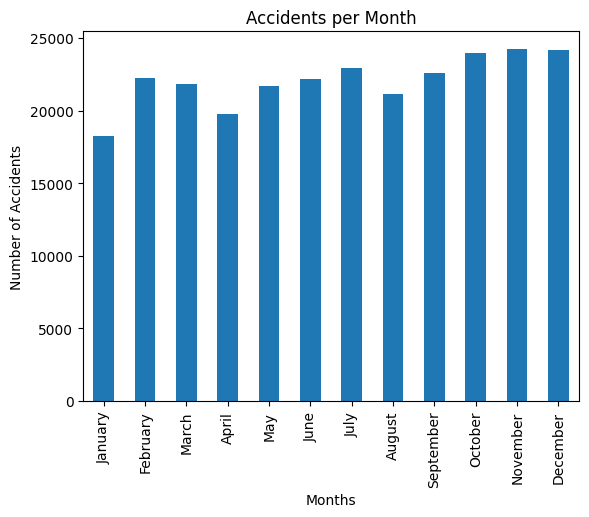

In [38]:
month_names = {1.0: 'January',
            2: 'February',
            3: 'March',
            4: 'April',
            5: 'May',
            6: 'June',
            7: 'July',
            8: 'August',
            9: 'September',
            10: 'October',
            11: 'November',
            12: 'December',     
           }
accidents_per_Month.index = accidents_per_Month.index.map(month_names)
accidents_per_Month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Months')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.20</h1>
<h2>December and November  have the highest number of  accidents and the Lowest is the Month of January</h2>